Calculate semi-major axis as a function of time for a RLO system with
* initial semi-major axis a = 100 Rsun (1 Rsun = 6.95e10 cm)
* initial donor mass m1 = 100 Msun (1 Msun = 1.989e33 g)
* initial accretor mass m2 = 30 Msun
* conservative mass transfer L = const, m1+m2 = const
* for semplicity, consider steps of mass dm = 1 Msun
untill m1 = 15 Msun. Then mass transfer stops.

Outline:
1. Use the Conservation: $m1+m2 = const$
2. Calculate the orbital angular momentum $ L $:
   $$
   L = \sqrt{G \cdot (m_1 + m_2) \cdot a} \cdot \frac{m_1 \cdot m_2}{m_1 + m_2}
   $$
   where:
   - $ G $ is the gravitational constant,
   - $ m_1 $ is the donor mass,
   - $ m_2 $ is the accretor mass,
   - $ a $ is the semi-major axis.

3. Update the donor and accretor masses:
   $$
   m_1' = m_1 - \Delta m, \quad m_2' = m_2 + \Delta m
   $$

4. Update the semi-major axis $ a $ using the conservation of angular momentum:
   $$
   a' = \left( \frac{L}{\sqrt{G \cdot (m_1' + m_2')} \cdot \frac{m_1' \cdot m_2'}{m_1' + m_2'}} \right)^2
   $$



In [2]:
import numpy as np
import pandas as pd

# Constants
G = 6.67430e-8  # Gravitational constant in cm^3 g^-1 s^-2
Msun = 1.989e33  # Solar mass in g
Rsun = 6.95e10  # Solar radius in cm

# Initial conditions
m1_initial = 100 * Msun  # Initial donor mass in g
m2_initial = 30 * Msun   # Initial accretor mass in g
a_initial = 100 * Rsun   # Initial semi-major axis in cm
total_mass = m1_initial + m2_initial  # Total mass (conserved)

# Mass transfer step
dm = 1 * Msun  # Mass transfer step in g
m1_min = 15 * Msun  # Minimum donor mass in g


m1 = m1_initial
m2 = m2_initial
a = a_initial

# Store results
q_values = []
a_values = []
results = []

while m1 > m1_min:
    results.append({'m1 (Msun)': m1 / Msun, 'm2 (Msun)': m2 / Msun, 'a (Rsun)': a / Rsun})
    
    J = np.sqrt(G * (m1 + m2) * a) * (m1 * m2 / (m1 + m2))  # Orbital angular momentum
    m1_new = m1 - dm  # Update m1
    m2_new = total_mass - m1_new  # Update m2 
    a = (J / (np.sqrt(G * (m1_new + m2_new)) * (m1_new * m2_new / (m1_new + m2_new))))**2  # New semi-major axis
    
    # Update m1 and m2
    m1, m2 = m1_new, m2_new

df = pd.DataFrame(results)
df.to_csv("rlo_semi_major_axis.csv", index=False)
df

,m1 (Msun),m2 (Msun),a (Rsun)
0,100.0,30.0,100.000000
1,99.0,31.0,95.553969
2,98.0,32.0,91.514603
3,97.0,33.0,87.835719
4,96.0,34.0,84.477725
...,...,...,...
81,19.0,111.0,202.343543
82,18.0,112.0,221.442744
83,17.0,113.0,243.886510
84,16.0,114.0,270.515928


Plot change of a as a function of q=m1/m2:

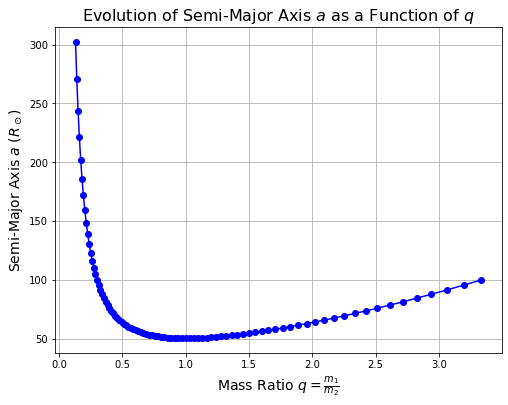

In [ ]:
import matplotlib.pyplot as plt

m1_values = df['m1 (Msun)'].values  
m2_values = df['m2 (Msun)'].values
q_values = m1_values / m2_values  
a_values = df['a (Rsun)'].values
 
plt.figure(figsize=(8, 6))
plt.plot(q_values, a_values, marker='o', linestyle='-', color='b')
plt.xlabel(r'Mass Ratio $q = \frac{m_1}{m_2}$', fontsize=14)
plt.ylabel(r'Semi-Major Axis $a$ ($R_\odot$)', fontsize=14)
plt.title(r'Evolution of Semi-Major Axis $a$ as a Function of $q$', fontsize=16)
plt.grid(True)
plt.show()


Plot change of m1 and m2 as a function of q

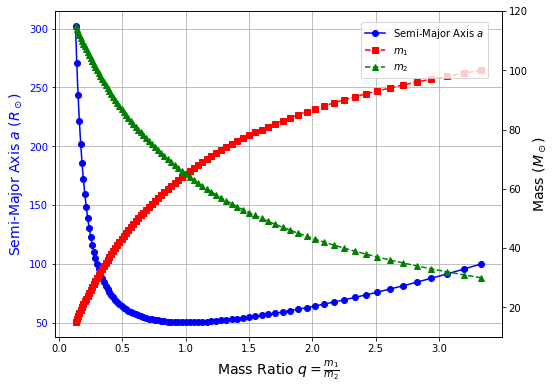

In [10]:
## plot m1 and m2 in the same plot

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(q_values, a_values, marker='o', linestyle='-', color='b', label='Semi-Major Axis $a$')
ax1.set_xlabel(r'Mass Ratio $q = \frac{m_1}{m_2}$', fontsize=14)
ax1.set_ylabel(r'Semi-Major Axis $a$ ($R_\odot$)', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(q_values, m1_values, marker='s', linestyle='--', color='r', label='$m_1$')
ax2.plot(q_values, m2_values, marker='^', linestyle='--', color='g', label='$m_2$')
ax2.set_ylabel(r'Mass ($M_\odot$)', fontsize=14, color='k')
ax2.tick_params(axis='y', labelcolor='k')

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98), bbox_transform=ax1.transAxes)
plt.show()
